## Observations and Insights

1. Tumor distrubution related to gender is almost equal (Male 50.6%, and Female 49,4%)
2. The 2 best drug regimens are 'Capomulin' and 'Ramicane' analyzing the final tumor volume across four of the most promising treatment regimens.
   Analyzing the IQR for each of four of the most promising treatment and watching the boxplot we can say that "Capomulin' and 'Ramicane' have given best results
   in tumor treatment. For 'Capomulin' 75% of the final tumor volume of the total of mice treated with that are in range 32-40 mm3,
   and for 'Ramicane' the range is 31-39 mm3
3. Analizing the timepoint related to the total tumor volume for a mouse treated with 'Capomulin', we can say that the use of this drug regimen performs positive 
   results in reducing the tumor volume.
4. The mouse weight is strongly correlated with tumor volume. As the mouse weight is becoming bigger the same thing happened with the tumor volume. The correlation
   between them is 0.84 what does mean that there is a strong correlation between them


## Dependencies and starter code

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset


In [4]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
mouse_study = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")
mouse_study.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
mouse_study.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


## Summary statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
mean = mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
sd = mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_study = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "SD": sd, "SEM": sem})
summary_study

,Mean,Median,Variance,SD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

<function matplotlib.pyplot.show(*args, **kw)>

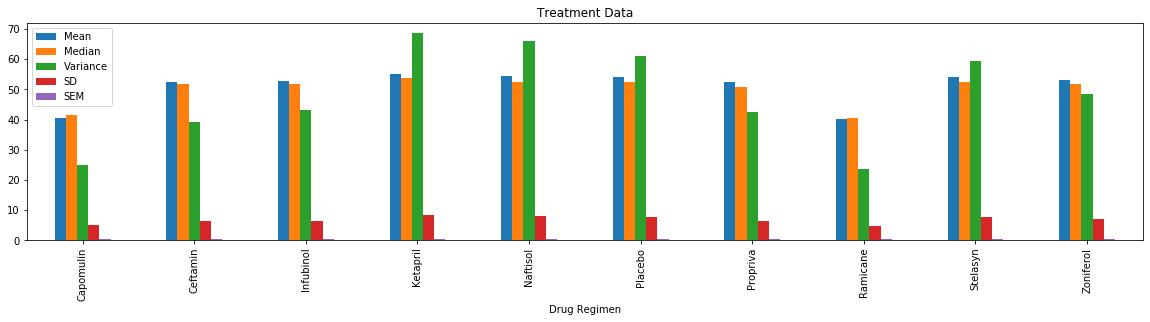

In [9]:
# Generating a bar plot relating the summary statistics of mean, median, variance, standart deviation,adn SEM of the tumor volume for each regimen
summary_study.plot(kind = "bar", figsize = (20,4))
plt.title("Treatment Data")
plt.show

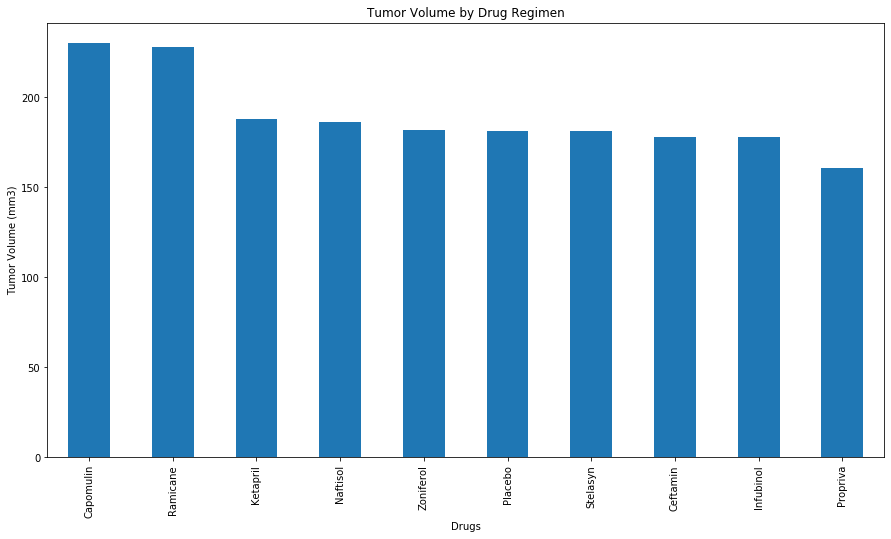

In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
counts = mouse_study["Drug Regimen"].value_counts()
counts.plot(kind="bar", figsize = (15,8))
plt.xlabel("Drugs")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume by Drug Regimen")
plt.show()

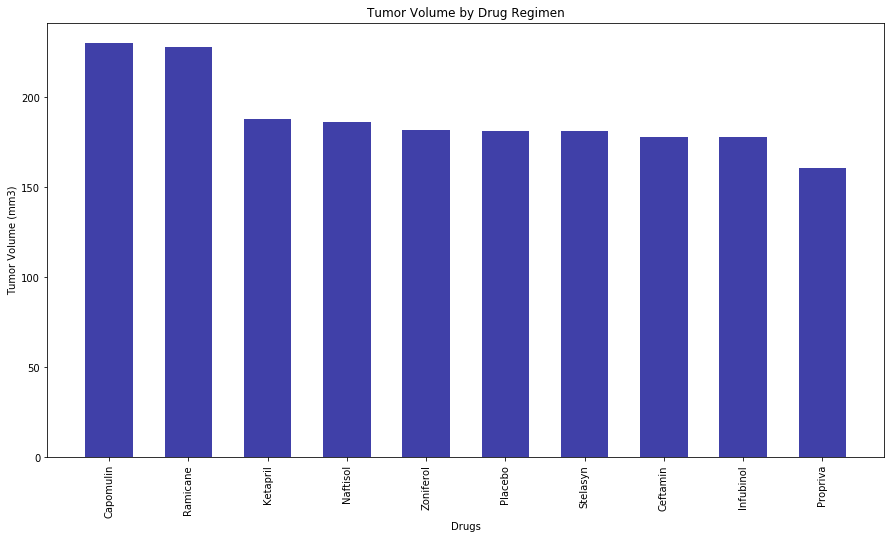

In [14]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
c = mouse_study["Drug Regimen"].value_counts()
plt.figure(figsize = (15,8))
plt.bar(c.index,c.values, color = "darkblue", alpha = 0.75, align = "center", width = 0.6)

tick_locations = c.index
plt.xticks(tick_locations, c.index, rotation = "vertical")
plt.title("Tumor Volume by Drug Regimen")
plt.xlabel("Drugs")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Pie plots

(-1.1045613723658971,
 1.1002172082078998,
 -1.105172849624489,
 1.1027130801595115)

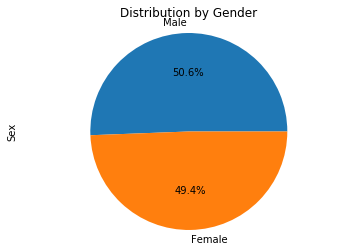

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = mouse_study["Sex"].value_counts()
gender.plot(kind = "pie", autopct="%1.1f%%")
plt.title("Distribution by Gender")
plt.axis("equal")

<function matplotlib.pyplot.show(*args, **kw)>

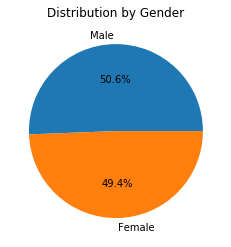

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_labels = ["Male", "Female"]
plt.pie(gender, labels = pie_labels, autopct="%1.1f%%")
plt.title("Distribution by Gender")
plt.show

## Quartiles, outliers and boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
each_mouse = mouse_study.loc[(mouse_study['Drug Regimen'] == 'Capomulin')|
                             (mouse_study['Drug Regimen'] == 'Ramicane')|
                             (mouse_study['Drug Regimen'] == 'Infubinol')| 
                             (mouse_study['Drug Regimen'] == 'Ceftamin')]
each_mouse['Drug Regimen'].unique()
each_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [18]:
final = mouse_study.loc[mouse_study['Timepoint'] == 45]
final.sort_values(by = ['Drug Regimen', 'Tumor Volume (mm3)'], ascending = True)
final.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [19]:
final_volume = final.loc[(mouse_study['Drug Regimen'] == 'Capomulin')|
                             (mouse_study['Drug Regimen'] == 'Ramicane')|
                             (mouse_study['Drug Regimen'] == 'Infubinol')| 
                             (mouse_study['Drug Regimen'] == 'Ceftamin')]
final_volume.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [20]:
# Calculating IQR of 'Capomulin'
capomulin_df = final_volume.loc[final_volume['Drug Regimen']== 'Capomulin']
capomulin = capomulin_df['Tumor Volume (mm3)']

quartiles = capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of capomulin is: {lowerq}")
print(f"The upper quartile of capomulin is: {upperq}")
print(f"The interquartile range of capomulin is: {iqr}")
print(f"The median of capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of capomulin is: 32.37735684
The upper quartile of capomulin is: 40.1592203
The interquartile range of capomulin is: 7.781863460000004
The median of capomulin is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [21]:
# Calculating the IQR of 'Ramicane'
ramicane_df = final_volume.loc[final_volume['Drug Regimen'] == 'Ramicane']
#Ramicane_df.head()
ramicane = ramicane_df['Tumor Volume (mm3)']

quartiles = ramicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of ramicane is: {lowerq}")
print(f"The upper quartile of ramicane is: {upperq}")
print(f"The interquartile range of ramicane is: {iqr}")
print(f"The median of ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of ramicane is: 30.981175224999998
The upper quartile of ramicane is: 38.508305307499995
The interquartile range of ramicane is: 7.527130082499998
The median of ramicane is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


In [22]:
# Calculating the IQR of 'Infubinol'
infubinol_df = final_volume.loc[final_volume['Drug Regimen'] == 'Infubinol']
#infubinol_df.head()
infubinol = infubinol_df['Tumor Volume (mm3)']

quartiles = infubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of infubinol is: {lowerq}")
print(f"The upper quartile of infubinol is: {upperq}")
print(f"The interquartile range of infubinol is: {iqr}")
print(f"The median of infubinol is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of infubinol is: 62.75445141
The upper quartile of infubinol is: 67.68556862
The interquartile range of infubinol is: 4.9311172099999965
The median of infubinol is: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


In [23]:
#Calculating the IQR of 'Ceftamin'
ceftamin_df = final_volume.loc[final_volume['Drug Regimen'] == 'Ceftamin']
#ceftamin_df.head()
ceftamin = ceftamin_df['Tumor Volume (mm3)']

quartiles = ceftamin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of ceftamin is: {lowerq}")
print(f"The upper quartile of ceftamin is: {upperq}")
print(f"The interquartile range of ceftamin is: {iqr}")
print(f"The median of ceftamin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of ceftamin is: 61.43389223
The upper quartile of ceftamin is: 67.52748237
The interquartile range of ceftamin is: 6.093590140000003
The median of ceftamin is: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


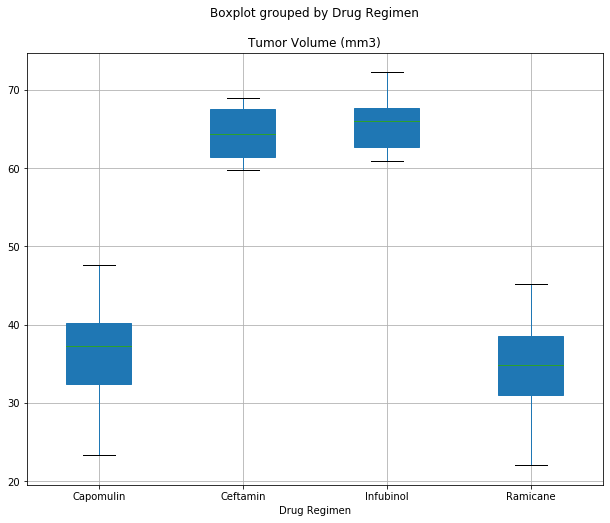

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_volume.boxplot(by = 'Drug Regimen', column = ['Tumor Volume (mm3)'], grid = True, figsize = (10,8),  patch_artist=True)


## Line and scatter plots

In [25]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

time_volume = mouse_study.loc[mouse_study['Drug Regimen'] == 'Capomulin']
time_volume.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [26]:
one_mouse = time_volume.loc[time_volume['Mouse ID']=='s710']
one_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
361,s710,Capomulin,Female,1,23,0,45.000000,0
362,s710,Capomulin,Female,1,23,5,43.180977,0
363,s710,Capomulin,Female,1,23,10,43.688026,0
364,s710,Capomulin,Female,1,23,15,41.845235,0
365,s710,Capomulin,Female,1,23,20,42.629963,1
366,s710,Capomulin,Female,1,23,25,43.060409,1
367,s710,Capomulin,Female,1,23,30,43.571703,1
368,s710,Capomulin,Female,1,23,35,44.160519,1
369,s710,Capomulin,Female,1,23,40,40.171920,1
370,s710,Capomulin,Female,1,23,45,40.728578,1


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 720x576 with 0 Axes>

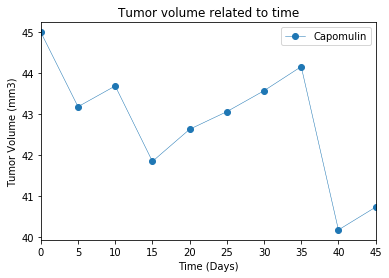

In [27]:

plt.figure(figsize=(10,8))

one_mouse.plot.line(x = 'Timepoint', y = 'Tumor Volume (mm3)', marker="o", linewidth=0.5, label='Capomulin')

plt.title('Tumor volume related to time')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()

plt.show

In [28]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

drug_weight = time_volume.groupby(['Mouse ID', 'Weight (g)'])['Tumor Volume (mm3)'].mean().reset_index() 
drug_weight.head()


,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


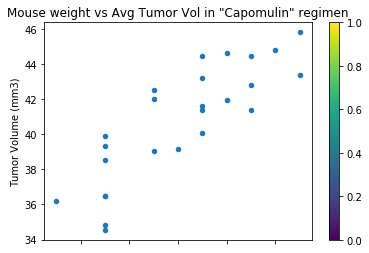

In [29]:
drug_weight.plot.scatter(x = 'Weight (g)', y = 'Tumor Volume (mm3)', colormap='viridis')
plt.title('Mouse weight vs Avg Tumor Vol in "Capomulin" regimen')
plt.show()

The correlation between both factors is 0.84


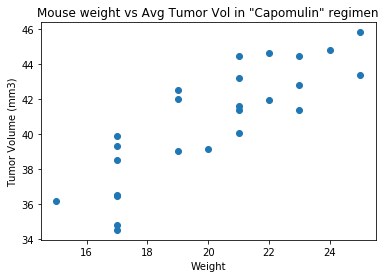

In [30]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for 
# the Capomulin regimen
plt.scatter(drug_weight.iloc[:,1],drug_weight.iloc[:,2])
weight = drug_weight.iloc[:,1]
avg_tumor_vol = drug_weight.iloc[:,2]
correlation = st.pearsonr(weight,avg_tumor_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}") 
plt.title('Mouse weight vs Avg Tumor Vol in "Capomulin" regimen')
plt.xlabel('Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

The r-squared is: 0.8419363424694718


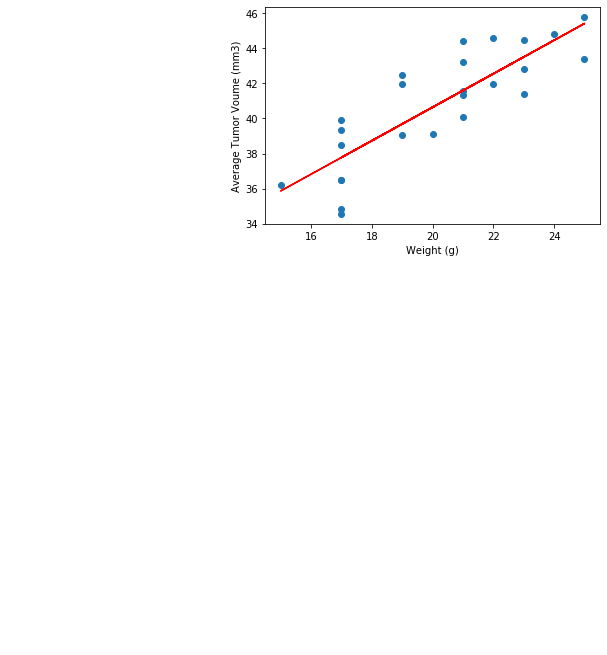

In [31]:
x_values = drug_weight['Weight (g)']
y_values = drug_weight['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Voume (mm3)')
print(f"The r-squared is: {rvalue}")
plt.show()